<a href="https://colab.research.google.com/github/gitmattalves/Regressao_Linear/blob/main/Exercicio_Regressao_Linear_Alura_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de Data Science - Regressão Linear
##Conhecendo o Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##O Dataset e o Projeto

Fonte: https://www.kaggle.com/greenwing1985/housepricing¶

**Descrição:**
Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.

Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.

Siga os passos propostos nos comentários acima de cada célular e bons estudos.

**Dados:**

precos - Preços do imóveis

area - Área do imóvel

garagem - Número de vagas de garagem

banheiros - Número de banheiros

lareira - Número de lareiras

marmore - Se o imóvel possui acabamento em mármore branco (1) ou não (0)

andares - Se o imóvel possui mais de um andar (1) ou não (0)

#Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [4]:
dados = pd.read_csv('/content/sample_data/HousePrices_HalfMil.csv', sep=';')

# Visualizar dados

In [5]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanhp do Dataset

In [6]:
dados.shape

(1000, 7)

In [7]:
dados.dtypes

precos       int64
area         int64
garagem      int64
banheiros    int64
lareira      int64
marmore      int64
andares      int64
dtype: object

# Análises Preliminares


##Estatísticas descritivas

In [8]:
dados.describe().round()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,41986.0,124.0,2.0,3.0,2.0,0.0,0.0
std,12140.0,72.0,1.0,1.0,1.0,0.0,1.0
min,13150.0,1.0,1.0,1.0,0.0,0.0,0.0
25%,33112.0,61.0,1.0,2.0,1.0,0.0,0.0
50%,41725.0,123.0,2.0,3.0,2.0,0.0,0.0
75%,51175.0,187.0,3.0,4.0,3.0,1.0,1.0
max,73675.0,249.0,3.0,5.0,4.0,1.0,1.0


**Matriz de correlação**

O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

**Observe as correlações entre as variáveis:**

* Quais são mais correlacionadas com a variável dependete 
(Preço)?

* Qual o relacionamento entre elas (positivo ou negativo)?
* Existe correlação forte entre as variáveis explicativas?

In [9]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


Para melhor visualização da correlação entre as variáveis, resolvi plotar o gráfico.

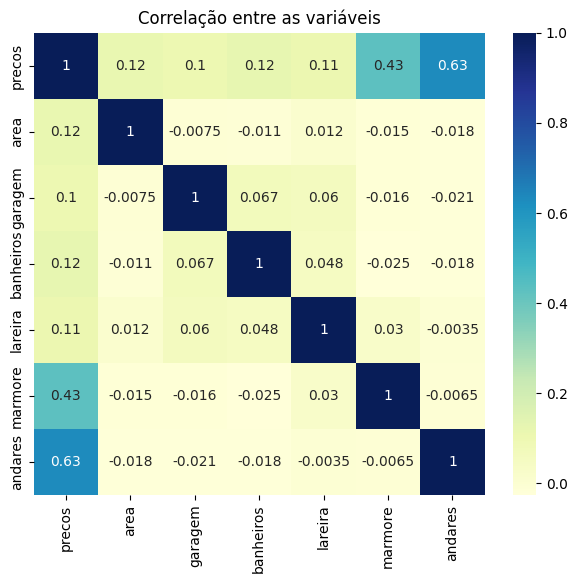

In [10]:
correlacao = dados.corr().round(4)

ax = plt.figure(figsize=(16,6))

ax = plt.subplot(1,2,1)
ax = sns.heatmap(correlacao, annot=True, cmap= "YlGnBu")
plt.title("Correlação entre as variáveis")

plt.show()

* Forte correlação entre preço e andares
* consideralvel correlação entre preços e marmore


## Comportamento da Variável Dependente 

##Análises Gráficas 

Box plot da variável dependente

**Avalie o comportamento da distribuição da variável dependente:**
* Parecem existir valores discrepantes (outliers)?

* O box plot apresenta alguma tendência?

<Axes: title={'center': 'Preço dos Imóveis'}, ylabel='Valores'>

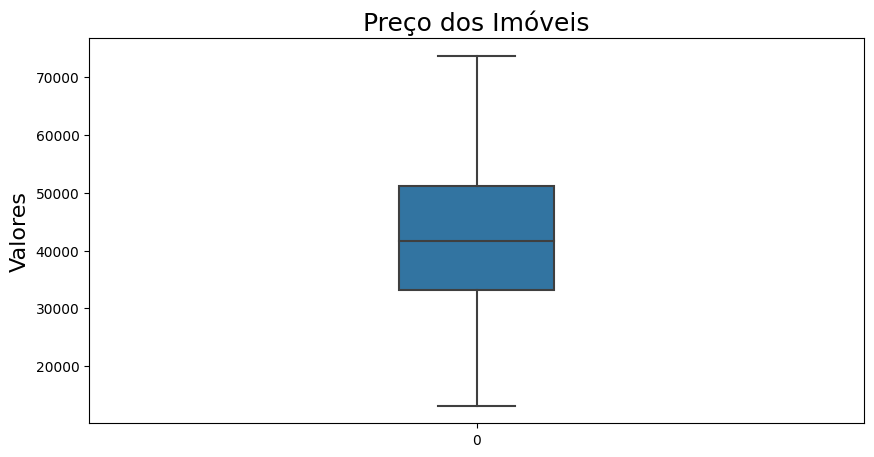

In [11]:
ax = sns.boxplot(data=dados['precos'], width=0.2)
ax.figure.set_size_inches(10,5)
ax.set_title('Preço dos Imóveis', fontsize=18)
ax.set_ylabel('Valores', fontsize=16)
ax

**Investigando a variável dependente (y) juntamente com outras característica**

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:

As estatísticas apresentam mudança significativa entre as categorias?
O box plot apresenta alguma tendência bem definida?

**Box-plot (Preço X Garagem)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Garagem', ylabel='Valores'>

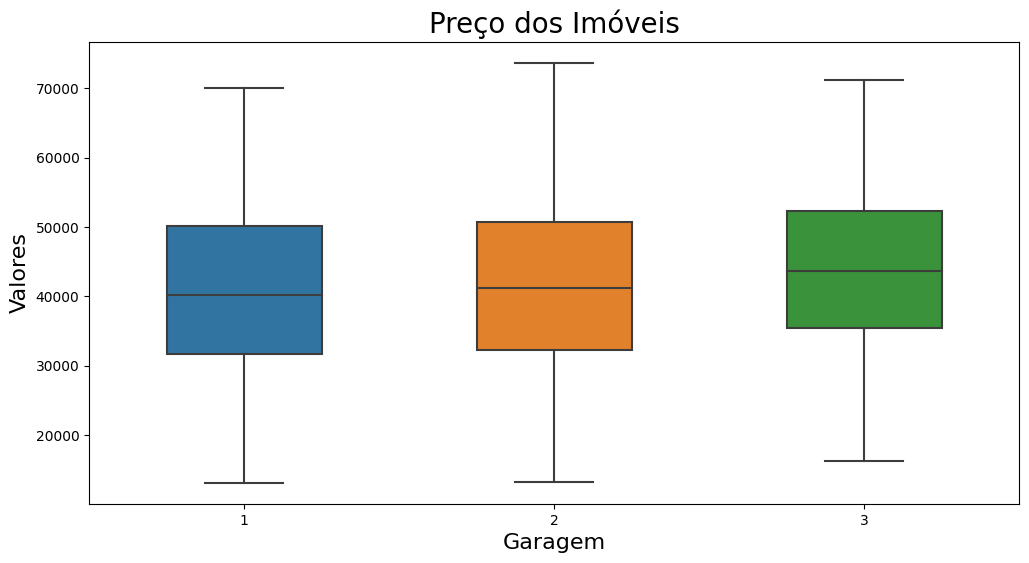

In [12]:
ax = sns.boxplot(data=dados, y='precos', x='garagem', orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Garagem', fontsize=16)
ax

**Box-plot (Preço X Banheiros)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Banheiros', ylabel='Valores'>

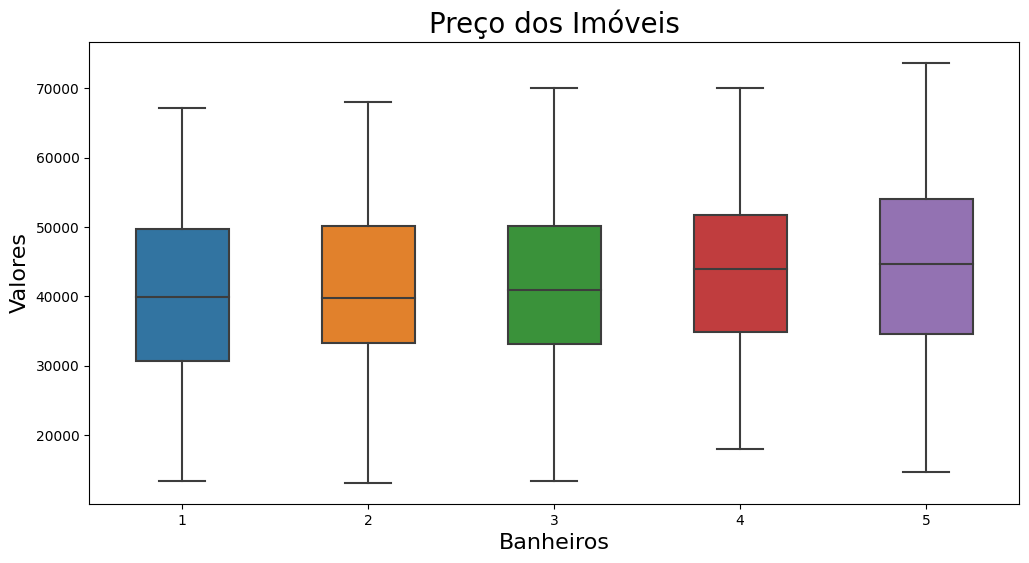

In [13]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Banheiros', fontsize=16)
ax

Box-plot (Preço X Lareira)

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Lareira', ylabel='Valores'>

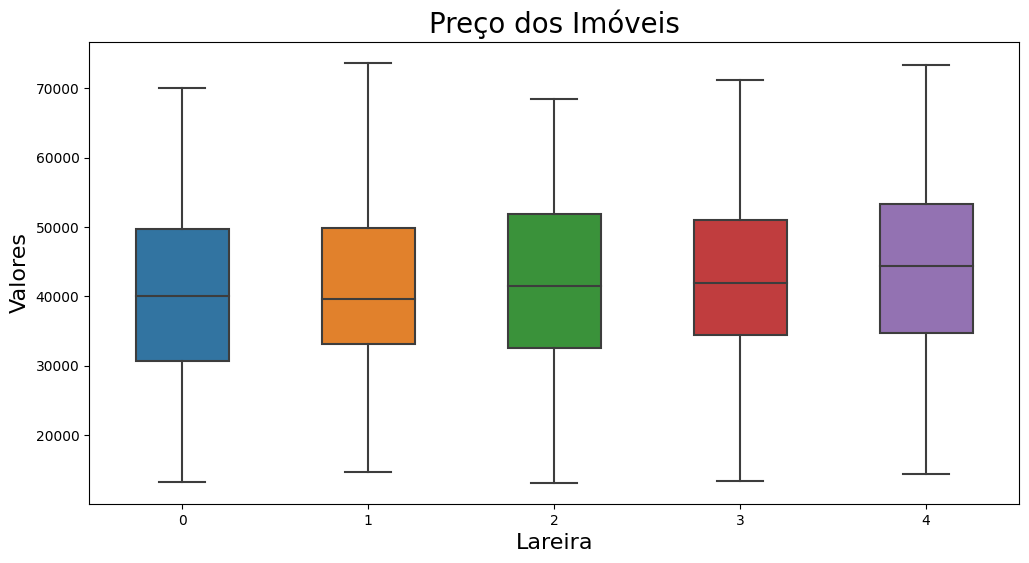

In [14]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Lareira', fontsize=16)
ax

Box-plot (Preço X Acabamento em Mármore)

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Acabamento com Mármore', ylabel='Valores'>

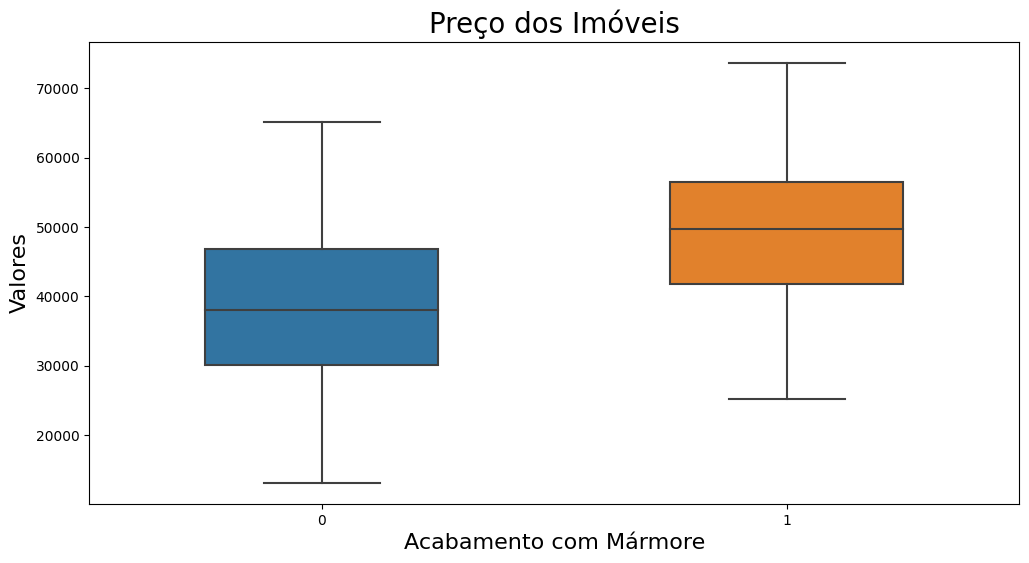

In [15]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Acabamento com Mármore', fontsize=16)
ax

**Box-plot (Preço X Andares)**

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Imóvel com Andares', ylabel='Valores'>

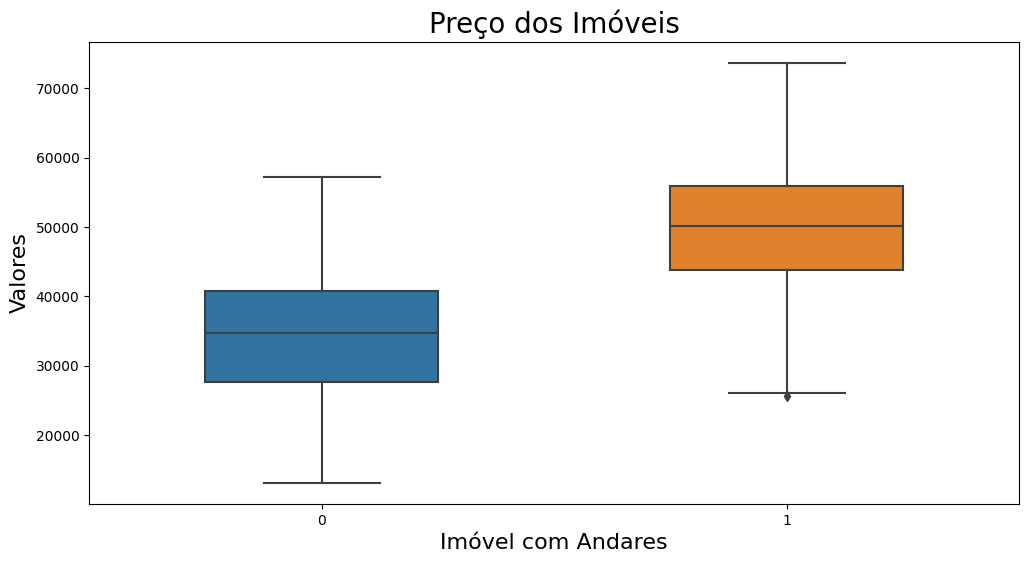

In [16]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('Valores', fontsize=16)
ax.set_xlabel('Imóvel com Andares', fontsize=16)
ax

**Distribuição de frequências da variável dependente (y)**

Construa um histograma da variável dependente (Preço).

Avalie:
* A distribuição de frequências da variável dependente parece ser assimétrica?
* É possível supor que a variável dependente segue uma distribuição normal?

<ipython-input-17-e284c45a2fdd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['precos'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='precos', ylabel='Valores dos Imóveis'>

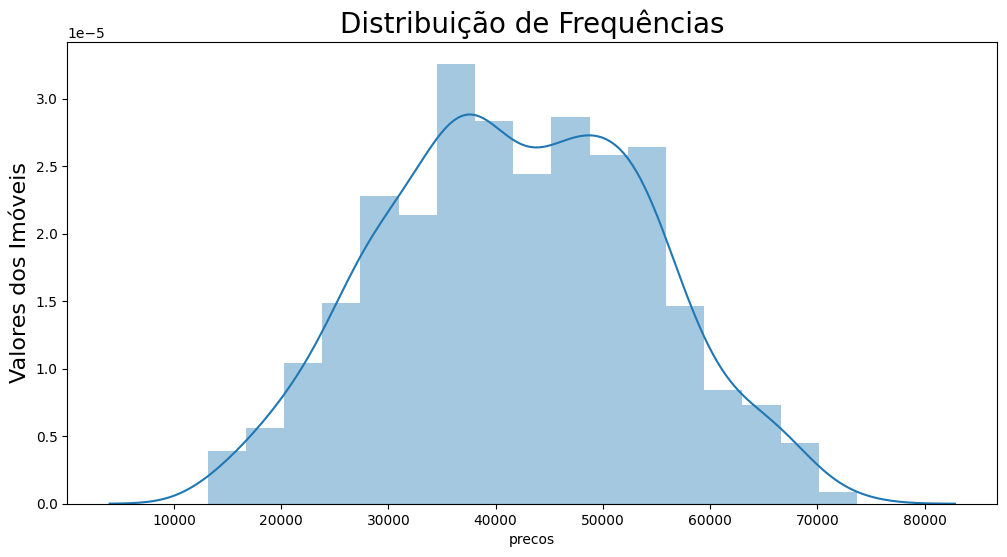

In [17]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Valores dos Imóveis', fontsize=16)
ax

**Gráficos de dispersão entre as variáveis do dataset**

Plotando o pairplot fixando somente uma variável no eixo y
https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

**Avalie:**
* É possível identificar alguma relação linear entre as variáveis?
* A relação é positiva ou negativa?
Compare com os resultados obtidos na matriz de correlação.

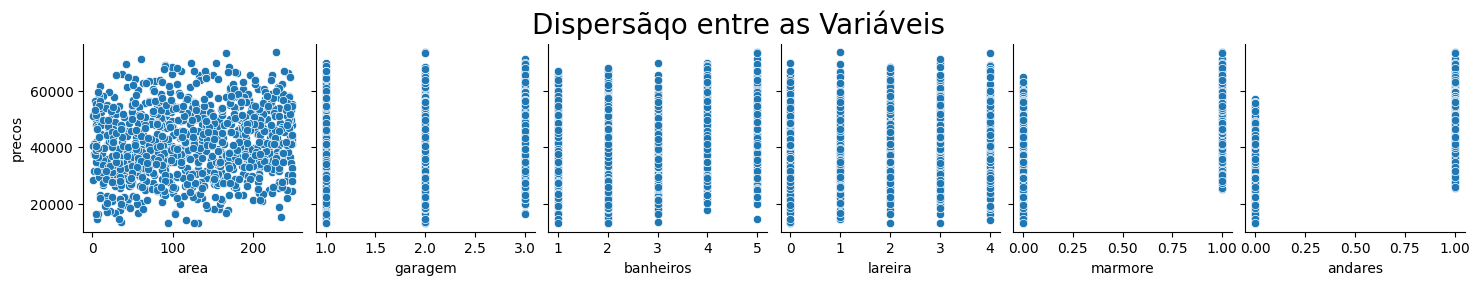

In [18]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
ax.fig.suptitle('Dispersãqo entre as Variáveis', fontsize=20, y=1.1)
ax

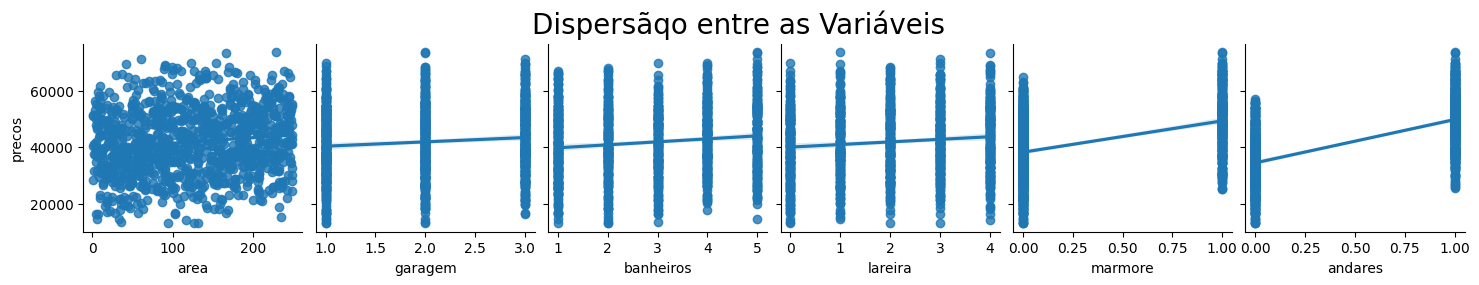

In [19]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersãqo entre as Variáveis', fontsize=20, y=1.1)
ax

#Estimando um Modelo de Regressão Linear

##Importando o train_test_split da biblioteca scikit-learn

In [20]:
from sklearn.model_selection import train_test_split

**Criando uma Series (pandas) para armazenar a variável dependente (y)**

In [21]:
y = dados['precos']

**Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)**

In [22]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

Criando os datasets de treino e de teste

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

##Importando LinearRegression e metrics da biblioteca scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Instanciando a classe LinearRegression()**

In [25]:
modelo = LinearRegression()

**Utilizando o método fit() para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)**

In [26]:
modelo.fit(X_train, y_train)

LinearRegression()

**Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO**

**Avalie:**

* O modelo apresenta um bom ajuste?

* Você lembra o que representa o R²?

* Qual medida podemos tomar para melhorar essa estatística?

In [27]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


**Gerando previsões para os dados de TESTE (X_test) utilizando o método predict()**

In [28]:
y_previsto = modelo.predict(X_test)

**Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo**

In [29]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.67


# Obtendo Previsões Pontuais


## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.


In [30]:
area = 38
garagem = 2 
banheiros = 4
lareira = 4
marmore = 0
andares = 1
entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 46389.80


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Métricas de Regressão

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:


**Obtendo métricas para o modelo **

In [31]:
EQM_2 = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2_2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métrics'])

,Métrics
EQM,50197019.50
REQM,7084.99
R²,0.67


**Importando a biblioteca pickle**

In [32]:
import pickle

**Salvando o modelo estimado**

In [33]:
output = open('modelo_precos_imoveis', 'wb')
pickle.dump(modelo, output)
output.close()